### Importing libraries

In [311]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt

### Importing data and basic exploration

In [314]:
# Importing dataset as dataframe
df = pd.read_csv('activities.csv')

In [316]:
# Quick look at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 94 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Activity ID                   152 non-null    int64  
 1   Activity Date                 152 non-null    object 
 2   Activity Name                 152 non-null    object 
 3   Activity Type                 152 non-null    object 
 4   Activity Description          80 non-null     object 
 5   Elapsed Time                  152 non-null    float64
 6   Distance                      152 non-null    float64
 7   Max Heart Rate                144 non-null    float64
 8   Relative Effort               144 non-null    float64
 9   Commute                       152 non-null    float64
 10  Activity Private Note         0 non-null      float64
 11  Activity Gear                 0 non-null      float64
 12  Filename                      152 non-null    object 
 13  Athle

In [318]:
# Change columnn names to lower case
df.columns=df.columns.str.lower() 

In [320]:
# Since there are 94 columns, let's create a new dataframe only with columns meaningful for the analysis
cols = ['activity id', 'activity date', 'activity type', 'elapsed time',  'distance',   
         'average heart rate', 'moving time', 'max speed', 'average speed', 'calories', 'total steps'
       ]
df = df[cols] 
df

,activity id,activity date,activity type,elapsed time,distance,average heart rate,moving time,max speed,average speed,calories,total steps
0,11343747416,"Apr 28, 2024, 1:31:04 PM",Run,1802.0,2994.610107,125.876801,1802.0,3.008002,1.661826,150.0,3726.0
1,11343747602,"Apr 25, 2024, 1:47:37 PM",Run,1802.0,3048.739990,125.785240,1802.0,3.204000,1.691865,162.0,3712.0
2,11343747698,"Apr 23, 2024, 2:01:57 PM",Run,1808.0,3080.899902,121.413620,1807.0,4.126000,1.704981,165.0,3736.0
3,11343748218,"Apr 22, 2024, 2:53:39 PM",Run,1573.0,2629.350098,120.675346,1573.0,4.214000,1.671551,135.0,3276.0
4,11350539733,"May 6, 2024, 6:37:06 PM",Run,1807.0,3044.459961,136.065857,1807.0,3.063334,1.684815,176.0,3812.0
...,...,...,...,...,...,...,...,...,...,...,...
147,13678509563,"Feb 20, 2025, 12:58:11 PM",Weight Training,4669.0,0.000000,112.255302,4669.0,0.000000,0.000000,344.0,NaN
148,13684492871,"Feb 21, 2025, 6:49:56 AM",Run,2580.0,6462.299805,155.454590,2400.0,4.000000,2.692625,397.0,7014.0
149,13688259821,"Feb 21, 2025, 4:02:12 PM",Workout,3176.0,0.000000,79.874367,3176.0,0.000000,0.000000,113.0,NaN
150,13696876844,"Feb 22, 2025, 10:20:15 AM",Walk,13648.0,13178.500000,100.413994,11225.0,3.350000,1.174031,839.0,17856.0


In [322]:
# The analysis concenrs only runs, so let's create a new dataframe
runs = df[df['activity type']=='Run']

In [324]:
runs = runs.copy()

### Missing values

In [327]:
# There are many missing values in the 'calories' column, let's just drop it
runs = runs.drop('calories', axis=1)

### Transforming data

#### activity date

In [331]:
# Breaking the activity date columns into time and date columns
runs['activity date'] = pd.to_datetime(runs['activity date'], format="mixed")
runs.info()

runs['day'] = runs['activity date'].dt.day
runs['month_name'] = runs['activity date'].dt.month_name()
runs['year'] = runs['activity date'].dt.year
runs['time'] = runs['activity date'].dt.time
runs.head()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 0 to 151
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   activity id         87 non-null     int64         
 1   activity date       87 non-null     datetime64[ns]
 2   activity type       87 non-null     object        
 3   elapsed time        87 non-null     float64       
 4   distance            87 non-null     float64       
 5   average heart rate  85 non-null     float64       
 6   moving time         87 non-null     float64       
 7   max speed           87 non-null     float64       
 8   average speed       87 non-null     float64       
 9   total steps         87 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 7.5+ KB


,activity id,activity date,activity type,elapsed time,distance,average heart rate,moving time,max speed,average speed,total steps,day,month_name,year,time
0,11343747416,2024-04-28 13:31:04,Run,1802.0,2994.610107,125.876801,1802.0,3.008002,1.661826,3726.0,28,April,2024,13:31:04
1,11343747602,2024-04-25 13:47:37,Run,1802.0,3048.739990,125.785240,1802.0,3.204000,1.691865,3712.0,25,April,2024,13:47:37
2,11343747698,2024-04-23 14:01:57,Run,1808.0,3080.899902,121.413620,1807.0,4.126000,1.704981,3736.0,23,April,2024,14:01:57
3,11343748218,2024-04-22 14:53:39,Run,1573.0,2629.350098,120.675346,1573.0,4.214000,1.671551,3276.0,22,April,2024,14:53:39
4,11350539733,2024-05-06 18:37:06,Run,1807.0,3044.459961,136.065857,1807.0,3.063334,1.684815,3812.0,6,May,2024,18:37:06


In [333]:
# Changing year, day and activity date to object 
runs['year'] = (runs['year']).astype(object) 
runs['day'] = (runs['day']).astype(object) 
runs['activity date'] = (runs['activity date']).astype(object) 
runs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 0 to 151
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   activity id         87 non-null     int64  
 1   activity date       87 non-null     object 
 2   activity type       87 non-null     object 
 3   elapsed time        87 non-null     float64
 4   distance            87 non-null     float64
 5   average heart rate  85 non-null     float64
 6   moving time         87 non-null     float64
 7   max speed           87 non-null     float64
 8   average speed       87 non-null     float64
 9   total steps         87 non-null     float64
 10  day                 87 non-null     object 
 11  month_name          87 non-null     object 
 12  year                87 non-null     object 
 13  time                87 non-null     object 
dtypes: float64(7), int64(1), object(6)
memory usage: 10.2+ KB


#### distance, elapsed time, moving time

In [336]:
# Converting distance from meters to km, elapsed time and moving time to minutes
runs['distance'] = runs['distance']/1000
runs['elapsed time'] = runs['elapsed time']/60
runs['moving time'] = runs['moving time']/60
runs

,activity id,activity date,activity type,elapsed time,distance,average heart rate,moving time,max speed,average speed,total steps,day,month_name,year,time
0,11343747416,2024-04-28 13:31:04,Run,30.033333,2.99461,125.876801,30.033333,3.008002,1.661826,3726.0,28,April,2024,13:31:04
1,11343747602,2024-04-25 13:47:37,Run,30.033333,3.04874,125.785240,30.033333,3.204000,1.691865,3712.0,25,April,2024,13:47:37
2,11343747698,2024-04-23 14:01:57,Run,30.133333,3.08090,121.413620,30.116667,4.126000,1.704981,3736.0,23,April,2024,14:01:57
3,11343748218,2024-04-22 14:53:39,Run,26.216667,2.62935,120.675346,26.216667,4.214000,1.671551,3276.0,22,April,2024,14:53:39
4,11350539733,2024-05-06 18:37:06,Run,30.116667,3.04446,136.065857,30.116667,3.063334,1.684815,3812.0,6,May,2024,18:37:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,13633904347,2025-02-15 13:26:31,Run,63.133333,10.01130,153.887085,61.833333,4.000000,2.698464,11046.0,15,February,2025,13:26:31
144,13648552096,2025-02-17 06:08:03,Run,31.750000,5.00870,150.916794,31.083333,3.340000,2.685630,5554.0,17,February,2025,06:08:03
146,13669497154,2025-02-19 13:14:02,Run,35.800000,6.01750,162.450745,35.033333,4.640000,2.862750,6078.0,19,February,2025,13:14:02
148,13684492871,2025-02-21 06:49:56,Run,43.000000,6.46230,155.454590,40.000000,4.000000,2.692625,7014.0,21,February,2025,06:49:56


#### new column - average pace

In [339]:
# Creating an average pace column
runs['avg pace'] = runs['elapsed time'] / runs['distance']
runs

,activity id,activity date,activity type,elapsed time,distance,average heart rate,moving time,max speed,average speed,total steps,day,month_name,year,time,avg pace
0,11343747416,2024-04-28 13:31:04,Run,30.033333,2.99461,125.876801,30.033333,3.008002,1.661826,3726.0,28,April,2024,13:31:04,10.029130
1,11343747602,2024-04-25 13:47:37,Run,30.033333,3.04874,125.785240,30.033333,3.204000,1.691865,3712.0,25,April,2024,13:47:37,9.851064
2,11343747698,2024-04-23 14:01:57,Run,30.133333,3.08090,121.413620,30.116667,4.126000,1.704981,3736.0,23,April,2024,14:01:57,9.780692
3,11343748218,2024-04-22 14:53:39,Run,26.216667,2.62935,120.675346,26.216667,4.214000,1.671551,3276.0,22,April,2024,14:53:39,9.970778
4,11350539733,2024-05-06 18:37:06,Run,30.116667,3.04446,136.065857,30.116667,3.063334,1.684815,3812.0,6,May,2024,18:37:06,9.892285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,13633904347,2025-02-15 13:26:31,Run,63.133333,10.01130,153.887085,61.833333,4.000000,2.698464,11046.0,15,February,2025,13:26:31,6.306207
144,13648552096,2025-02-17 06:08:03,Run,31.750000,5.00870,150.916794,31.083333,3.340000,2.685630,5554.0,17,February,2025,06:08:03,6.338970
146,13669497154,2025-02-19 13:14:02,Run,35.800000,6.01750,162.450745,35.033333,4.640000,2.862750,6078.0,19,February,2025,13:14:02,5.949314
148,13684492871,2025-02-21 06:49:56,Run,43.000000,6.46230,155.454590,40.000000,4.000000,2.692625,7014.0,21,February,2025,06:49:56,6.653978


## Data analysis

In [342]:
runs[['elapsed time', 'distance', 'average heart rate', 'moving time', 'max speed', 'average speed', 'total steps', 'avg pace']].describe().round(1)


,elapsed time,distance,average heart rate,moving time,max speed,average speed,total steps,avg pace
count,87.0,87.0,85.0,87.0,87.0,87.0,87.0,87.0
mean,39.2,5.1,143.4,37.7,3.7,2.2,6057.7,7.9
std,11.5,1.7,9.9,10.8,0.6,0.3,2041.5,1.2
min,26.2,2.6,120.7,26.2,2.7,1.7,3276.0,5.9
25%,30.1,3.7,136.5,30.1,3.3,2.0,4606.0,7.2
50%,36.2,5.0,145.2,34.3,3.5,2.2,5664.0,7.7
75%,44.0,6.0,150.4,40.5,4.0,2.4,6713.0,8.3
max,90.7,12.0,166.0,90.2,6.7,2.9,15284.0,14.7


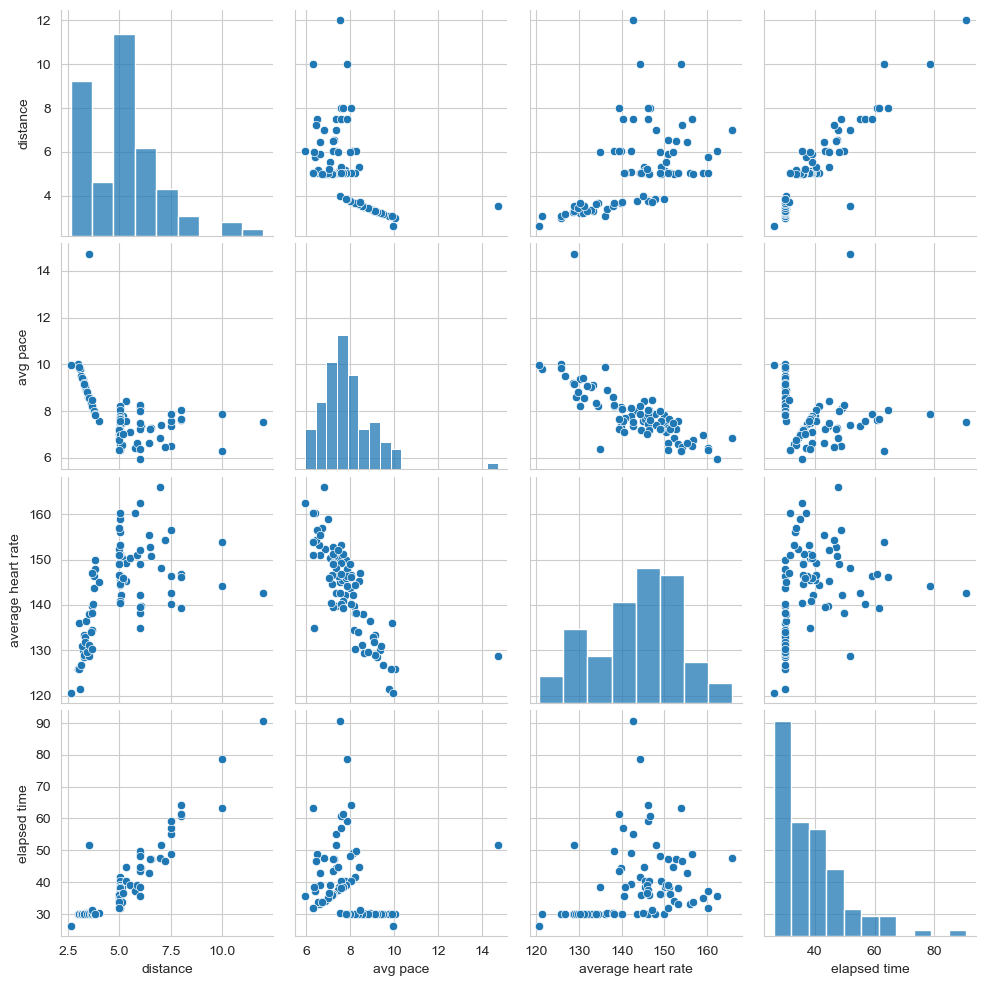

In [345]:
# Let's create a pairs plot using the seaborn library to identify trends. I picked only few varabiales so that it won't get messy.
pp_runs = runs[['distance', 'avg pace', 'average heart rate', 'elapsed time']]
sns.pairplot(pp_runs)

# The histograms shows us the distribution of a single variable and the scatter plots depict the relationship between two variables. 
# In the distance histogram I can see that most of my runs are rather short (up to 5 km on average).
# It's also noticable, that there is a negative correlation between average heart rate and average pace.  

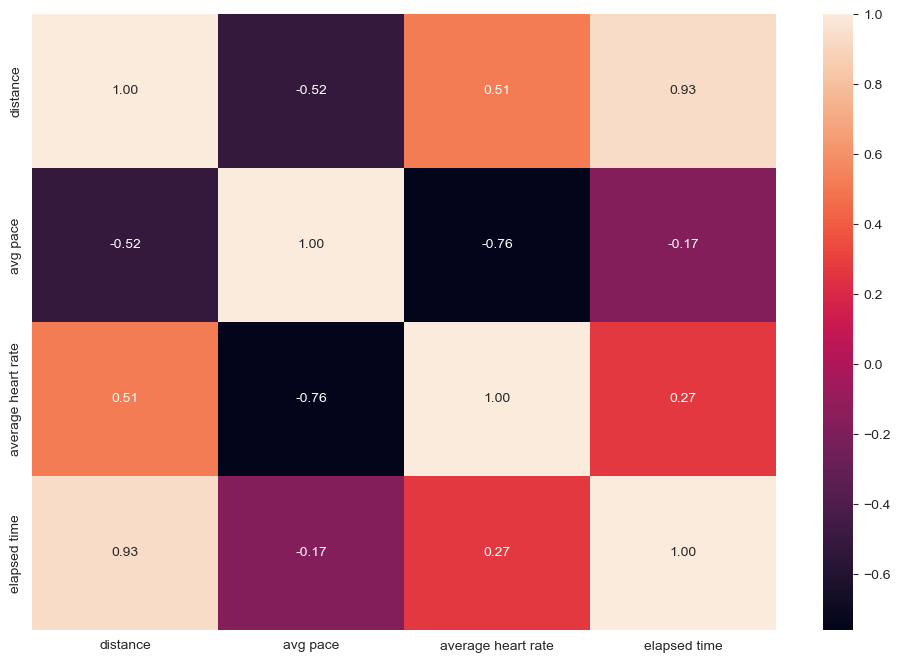

In [346]:
# We can also create a heatmap to see what is the exact correlation between chosen variables
corr = pp_runs.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, fmt=".2f");

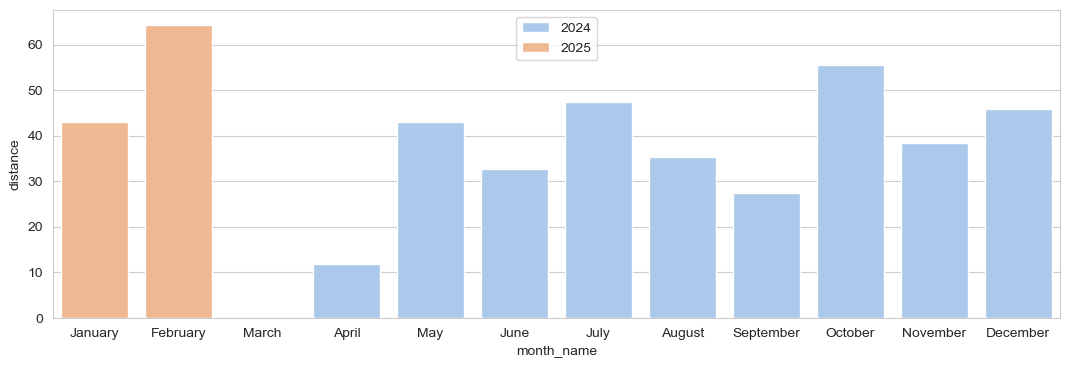

In [347]:
# Let's create a bar plot using seaborn library to see how the distance changed throught the year

sns.set_style('whitegrid')
sns.barplot(x='month_name', y='distance', data=runs, hue='year', errorbar=None, estimator=np.sum, palette = "pastel",
           order =["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.gcf().set_size_inches(13, 4)
plt.legend(loc='upper center')

# In April the total distance is really small comparing to other months, but the first entry in the dataset is from end of April. 
# It seems that the distance I ran in February 2025 was the highest of all months. 